### Notebook for the cell proportion analysis of Mixed cell states in Healthy_vs_COPD CTRL_vs_IAV data

- **Developed by**: Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231204
- **Last modified**: 231204

### Load required packages

In [1]:
import milopy
import numpy as np
import pandas as pd
import scanpy as sc
import milopy.core as milo
import matplotlib.pyplot as plt

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                 10.1.0
appnope             0.1.3
asttokens           NA
cffi                1.16.0
comm                0.2.0
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.0
decorator           5.1.1
exceptiongroup      1.2.0
executing           2.0.1
get_annotations     NA
h5py                3.10.0
importlib_resources NA
ipykernel           6.27.1
ipywidgets          8.1.1
jedi                0.19.1
jinja2              3.1.2
joblib              1.3.2
kiwisolver          1.4.5
llvmlite            0.41.1
markupsafe          2.1.3
matplotlib          3.8.2
milopy              0.1.1
mpl_toolkits        NA
natsort             8.4.0
numba               0.58.1
numpy               1.26.2
packaging           23.2
pandas              2.1.3
parso               0.8.3
patsy               0.5.4
pexpect             4.9.0
platformdirs        4.0.0
prompt_toolkit      3.0.41
psutil              5

### Load working object

In [3]:
adata_all = sc.read_h5ad('../../../data/Marburg_cell_states_locked_scANVI_ctl230901.raw.h5ad')
adata_all

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Subset population of interest

In [4]:
adata_all.obs['cell_type'].cat.categories

Index(['ciliated', 'club', 'basal', 'goblet', 'mixed'], dtype='object')

In [5]:
adata = adata_all[adata_all.obs['cell_type'].isin(['ciliated'])]
adata

View of AnnData object with n_obs × n_vars = 4645 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

In [6]:
adata.obs['batch'].cat.categories

Index(['CHE01_CTRL', 'CHE01_IAV', 'CHE02_CTRL', 'CHE02_IAV', 'CHE03_CTRL',
       'CHE03_IAV', 'CSE03_CTRL', 'CSE03_IAV', 'CSE_06_CRTL', 'CSE_06_IAV',
       'GER02_CTRL', 'GER02_IAV', 'GER12_CTRL', 'GER12_IAV', 'GER14_CRTL',
       'GER14_IAV', 'GnR08_CTRL', 'GnR08_IAV', 'GnR_07_CTRL', 'GnR_07_IAV',
       'ST07_CSE_CTRL', 'ST08_GnR_CTRL', 'ST09_CSE_IAV', 'ST10_GnR_IAV'],
      dtype='object')

### Build k-NN graph

In [7]:
sc.pp.neighbors(adata, n_neighbors = 50, random_state = 1712, use_rep = 'X_scANVI')

computing neighbors


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


### Construct neighbourhoods a lá `milo`

In [8]:
milo.make_nhoods(adata)
adata.obsm["nhoods"]

/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.39006329 2.97293186 2.89631963 1.91935015 2.84500384 1.82109499
 2.05043459 1.7709161  2.22910857 2.51036763 1.92564535 3.57777023
 2.52884293 2.26066804 2.34003401 2.36205578 2.25360084 2.51970387
 2.46311927 2.08964515 2.18165421 2.54595423 2.00353789 1.88325548
 2.08924413 1.83170843 1.6125586  3.11199999 2.62938786 2.10713553
 1.90232992 2.08085346 2.22769046 1.77205229 1.94281125 2.92419171
 1.65500128 2.90839076 1.74788308 2.67299032 1.85807431 2.53765392
 1.88505852 2.20244932 2.88665819 2.15857792 1.91709518 1.9314034
 2.24133825 2.36167884 2.7541616  1.73694587 2.45072079 2.69758105
 2.93399906 2.8909955  2.05065179 1.96301329 2.26364684 2.39024353
 2.28229356 1.80955219 1.79089618 1.86849737 2.37951231 2.01478171
 2.16242933 2.13909364 1.84407794 1.94730985 2.09973502 2.0

<4645x327 sparse matrix of type '<class 'numpy.float32'>'
	with 32501 stored elements in Compressed Sparse Row format>

In [9]:
adata[adata.obs['nhood_ixs_refined'] != 0].obs[['nhood_ixs_refined', 'nhood_kth_distance']]

,nhood_ixs_refined,nhood_kth_distance
872846-ST07_CSE_CTRL-V1,1,3.390063
2672324-CSE_06_CRTL-V2,1,2.972932
9607343-CSE_06_CRTL-V2,1,2.896320
1628191-CSE_06_CRTL-V2,1,1.919350
13744603-CSE_06_CRTL-V2,1,2.845004
...,...,...
1050286-CSE03_IAV-V6,1,2.219348
7399737-CSE03_IAV-V6,1,2.138707
9157670-CSE03_IAV-V6,1,2.768966
3705676-CSE03_IAV-V6,1,2.927435


(array([ 2.,  0.,  1.,  0.,  6.,  4.,  3.,  2.,  1.,  3.,  8.,  4.,  2.,
        12., 10., 11.,  7.,  7.,  6., 16.,  4.,  8.,  9., 16.,  3.,  8.,
        10.,  5.,  8.,  2., 16.,  6., 13.,  3.,  8.,  2., 11.,  2.,  2.,
         8.,  3.,  2.,  3.,  6.,  2.,  7.,  3.,  6.,  4.,  1.,  3.,  0.,
         4.,  1.,  5.,  0.,  0.,  3.,  4.,  1.,  1.,  1.,  0.,  3.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 55.        ,  56.45999908,  57.91999817,  59.38000107,
         60.84000015,  62.29999924,  63.75999832,  65.22000122,
         66.68000031,  68.13999939,  69.59999847,  71.05999756,
         72.51999664,  73.98000336,  75.44000244,  76.90000153,
         78.36000061,  79.81999969,  81.27999878,  82.73999786,
         84.19999695,  85.66000366,  87.12000275,  88.58000183,
         90.04000092,  91.5       ,  92.95999908, 

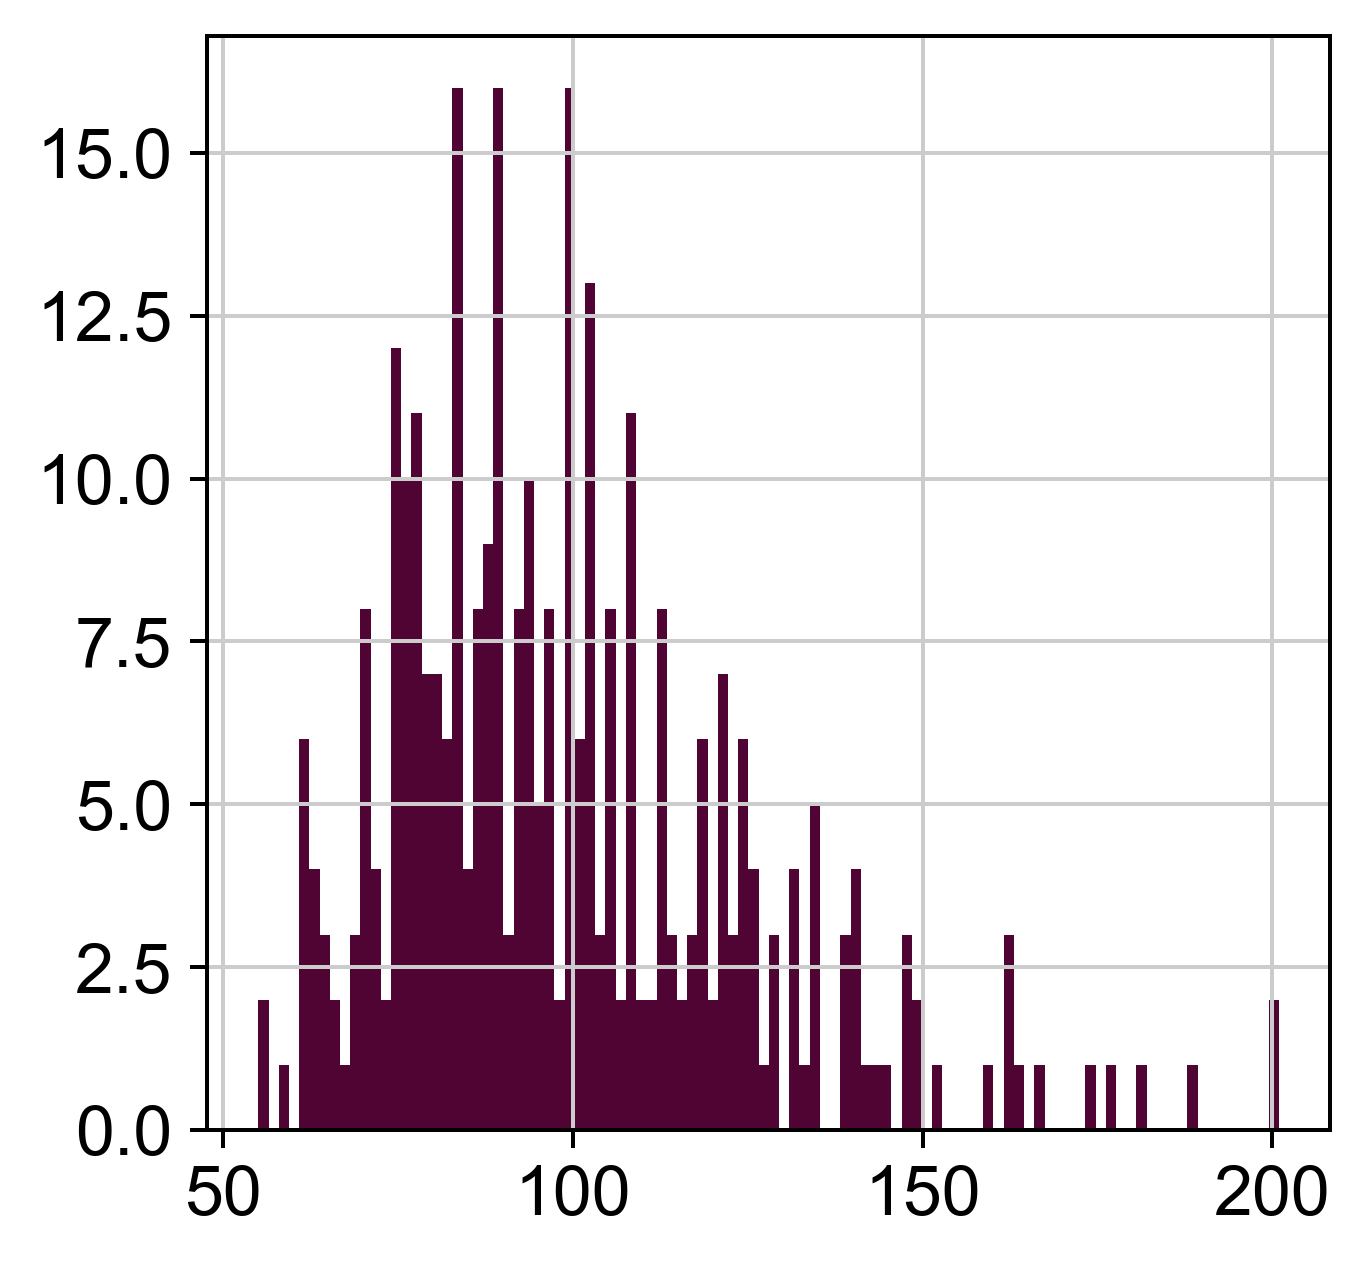

In [10]:
nhood_size = np.array(adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins = 100, color = '#4F0433')

### Count cells in neighbourhoods

In [11]:
milo.count_nhoods(adata, sample_col = "batch")
adata.uns["nhood_adata"]

AnnData object with n_obs × n_vars = 327 × 24
    obs: 'index_cell', 'kth_distance'
    uns: 'sample_col'

### Differential abundance testing with GLM

In [12]:
milo.DA_nhoods(adata, design = "~ group")
adata.uns["nhood_adata"].obs

/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:239: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if design_df.dtypes[i].name == 'category':
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:311: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalues = pvalues[keep_nhoods][o]
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:312: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR
0,872846-ST07_CSE_CTRL-V1,3.390063,2.164642,12.055859,5.046518,0.024709,0.061248,0.062419
1,2672324-CSE_06_CRTL-V2,2.972932,-3.581603,11.960114,8.140544,0.004342,0.016705,0.017747
2,9607343-CSE_06_CRTL-V2,2.896320,1.856304,12.215731,4.106912,0.042749,0.096406,0.097829
3,1628191-CSE_06_CRTL-V2,1.919350,-2.225916,11.948353,4.055728,0.044063,0.098017,0.099457
4,13744603-CSE_06_CRTL-V2,2.845004,-1.173520,12.228043,1.647715,0.199316,0.316389,0.318161
...,...,...,...,...,...,...,...,...
322,1050286-CSE03_IAV-V6,2.219348,0.616983,13.000860,0.655908,0.418038,0.555027,0.554531
323,7399737-CSE03_IAV-V6,2.138707,0.367323,12.215693,0.185354,0.666826,0.734182,0.735321
324,9157670-CSE03_IAV-V6,2.768966,4.862346,12.249596,20.150978,0.000007,0.000066,0.000077
325,3705676-CSE03_IAV-V6,2.927435,0.490293,12.402593,0.355742,0.550901,0.658471,0.658540


- Evaluate results

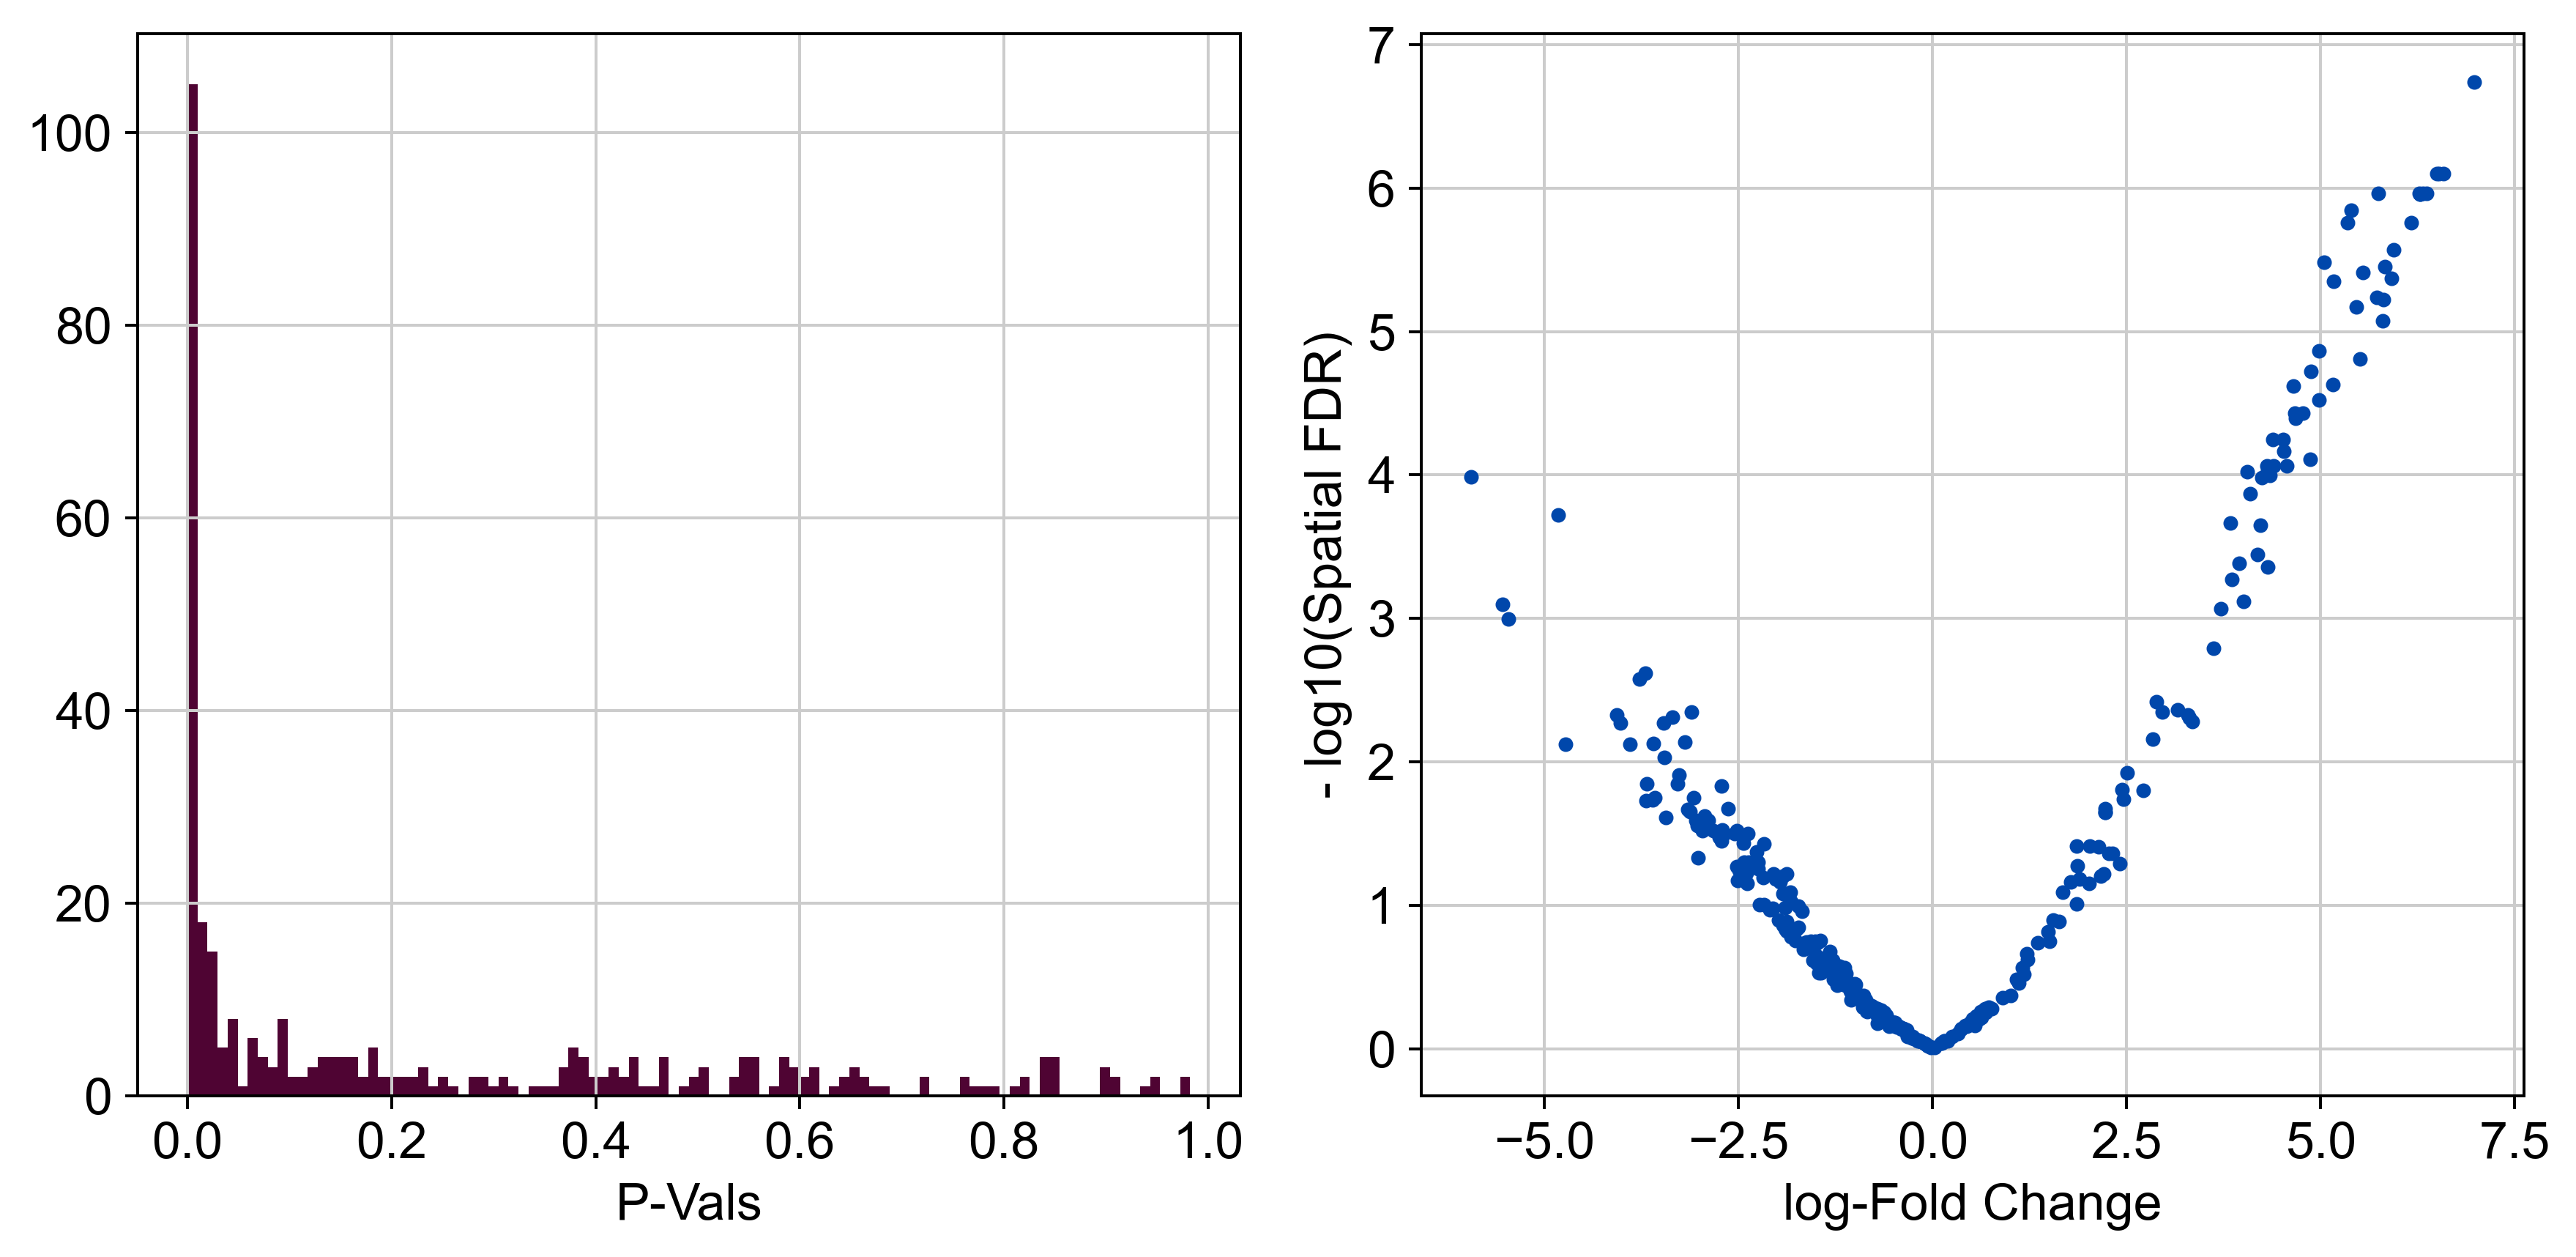

In [13]:
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(1,2,1)
plt.hist(adata.uns["nhood_adata"].obs.PValue, bins = 100, color = '#4F0433')
plt.xlabel("P-Vals");
plt.subplot(1,2,2)
plt.plot(adata.uns["nhood_adata"].obs.logFC, -np.log10(adata.uns["nhood_adata"].obs.SpatialFDR), '.', color = '#0047AB')
plt.xlabel("log-Fold Change")
plt.ylabel("- log10(Spatial FDR)")
plt.tight_layout()
plt.rcParams["figure.figsize"] = old_figsize

In [14]:
milo_results = adata.uns["nhood_adata"].obs
milo_results

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR
0,872846-ST07_CSE_CTRL-V1,3.390063,2.164642,12.055859,5.046518,0.024709,0.061248,0.062419
1,2672324-CSE_06_CRTL-V2,2.972932,-3.581603,11.960114,8.140544,0.004342,0.016705,0.017747
2,9607343-CSE_06_CRTL-V2,2.896320,1.856304,12.215731,4.106912,0.042749,0.096406,0.097829
3,1628191-CSE_06_CRTL-V2,1.919350,-2.225916,11.948353,4.055728,0.044063,0.098017,0.099457
4,13744603-CSE_06_CRTL-V2,2.845004,-1.173520,12.228043,1.647715,0.199316,0.316389,0.318161
...,...,...,...,...,...,...,...,...
322,1050286-CSE03_IAV-V6,2.219348,0.616983,13.000860,0.655908,0.418038,0.555027,0.554531
323,7399737-CSE03_IAV-V6,2.138707,0.367323,12.215693,0.185354,0.666826,0.734182,0.735321
324,9157670-CSE03_IAV-V6,2.768966,4.862346,12.249596,20.150978,0.000007,0.000066,0.000077
325,3705676-CSE03_IAV-V6,2.927435,0.490293,12.402593,0.355742,0.550901,0.658471,0.658540


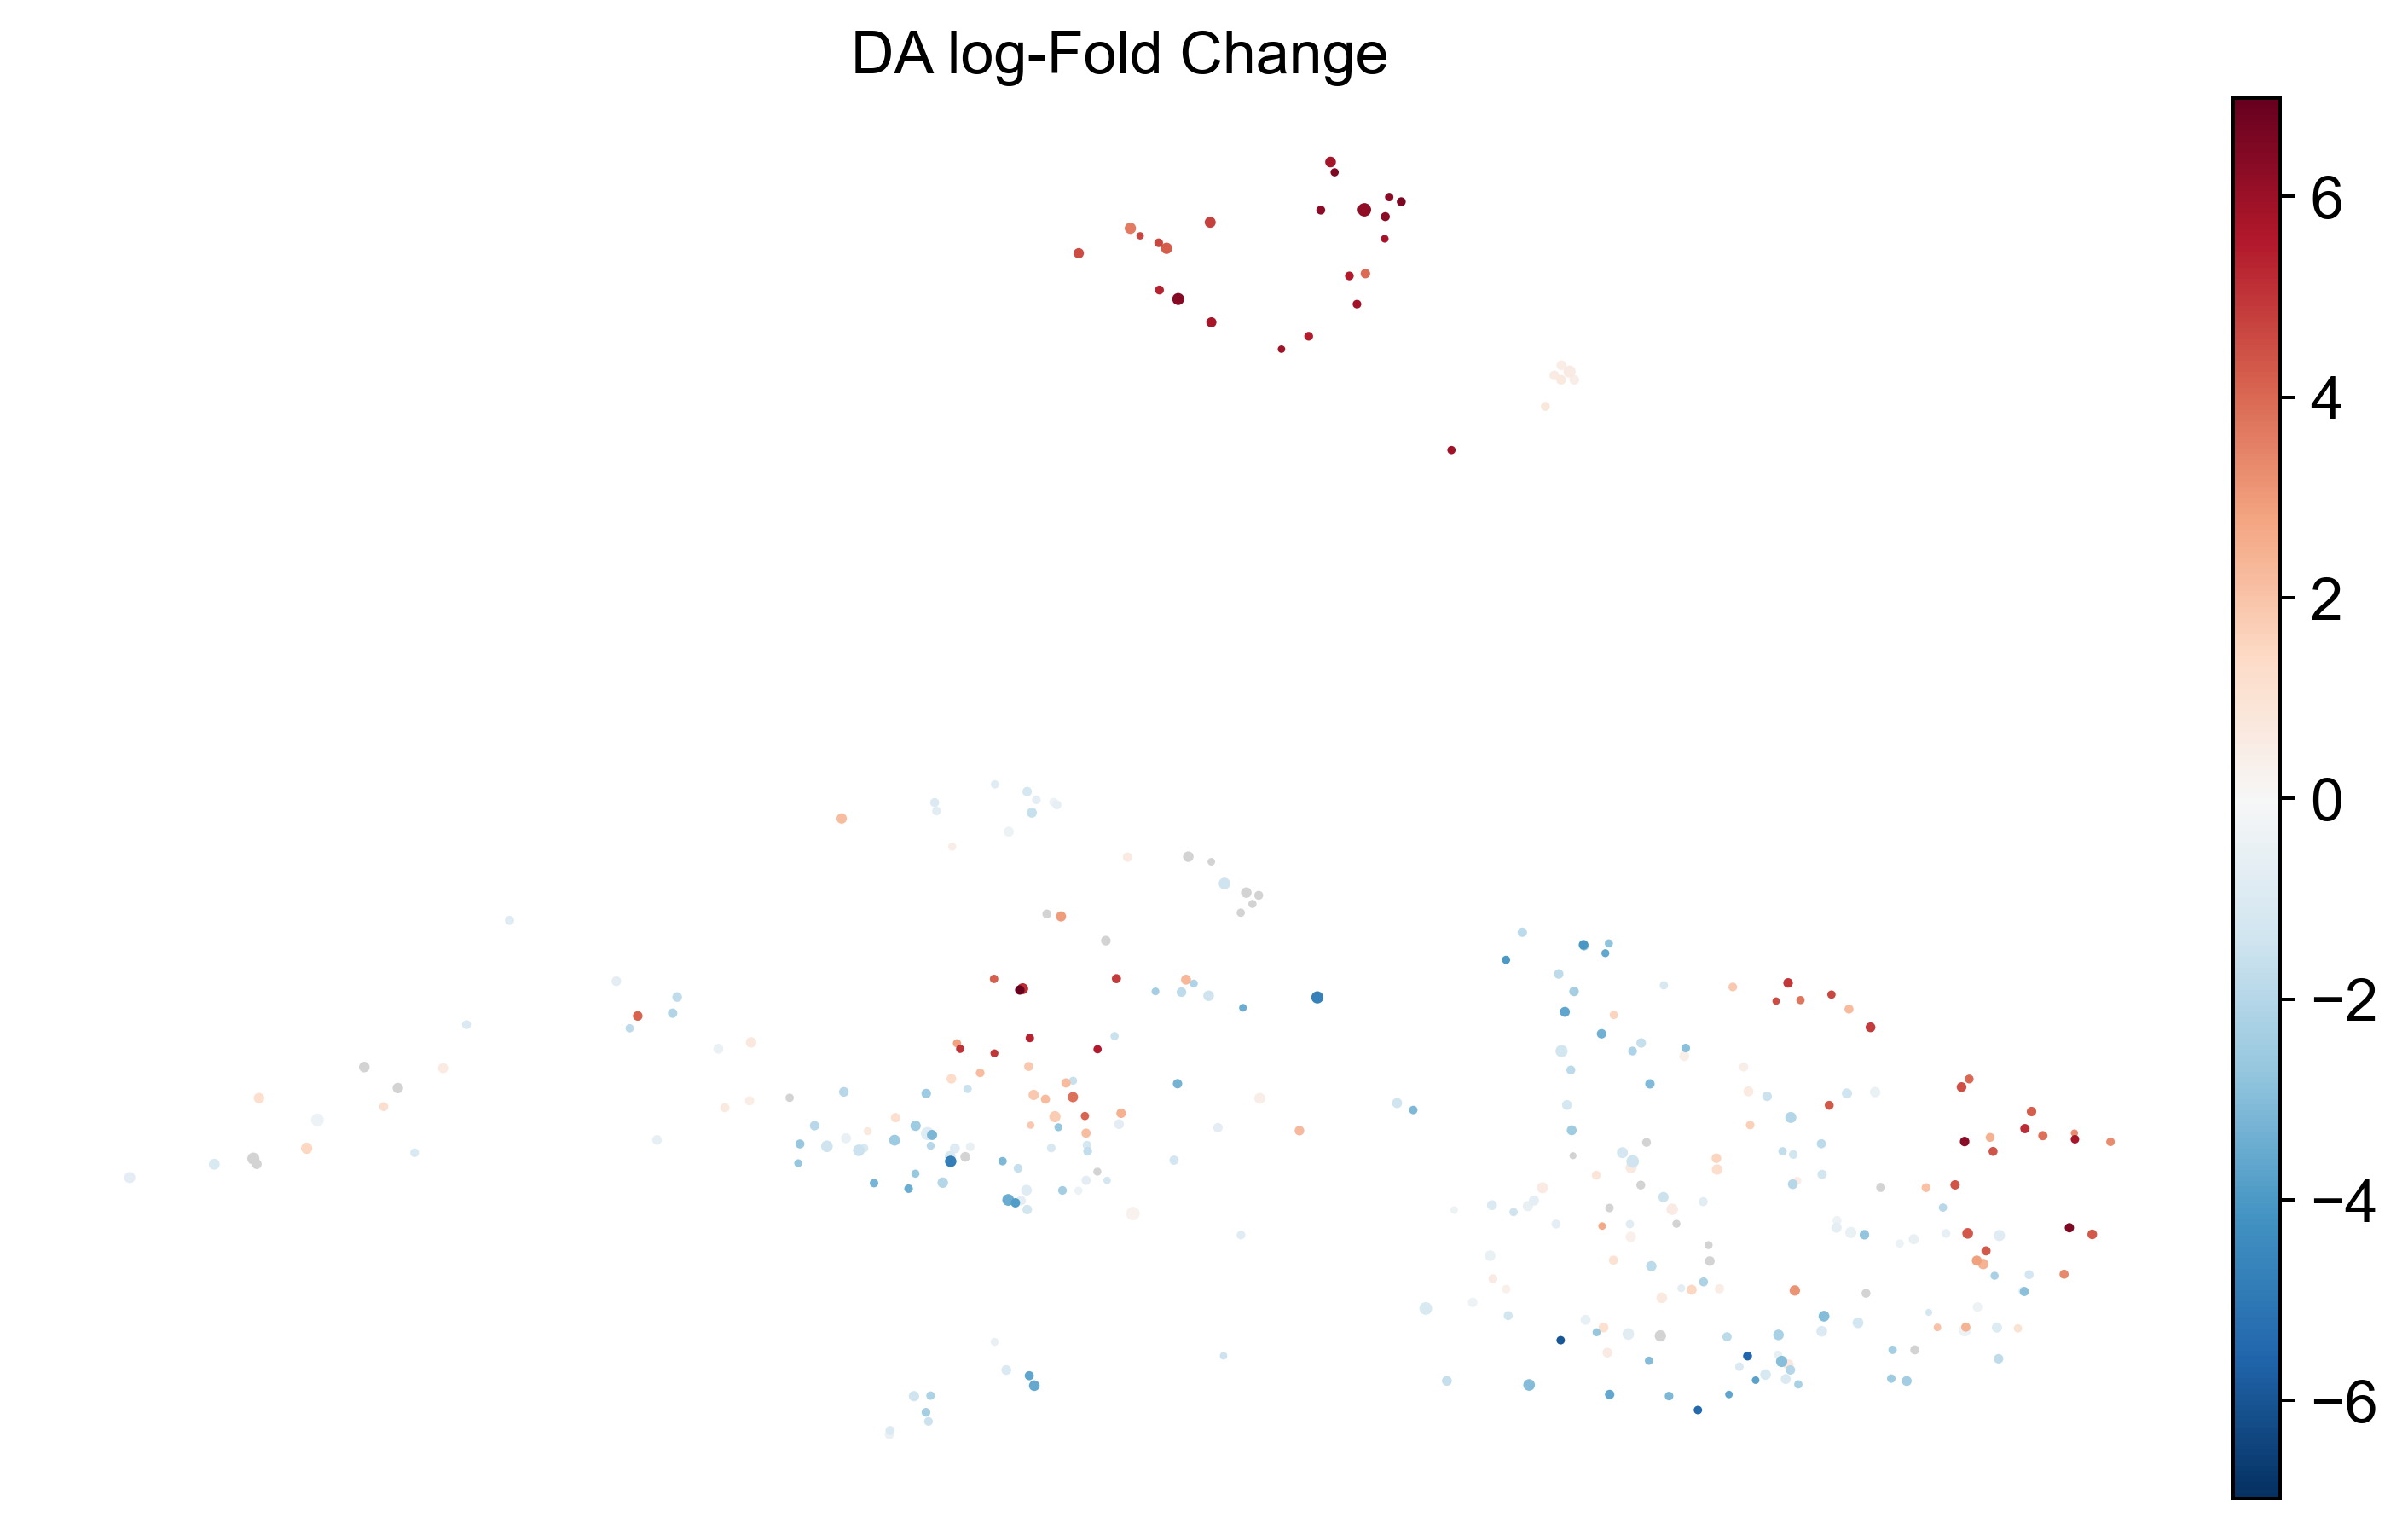

In [15]:
plt.rcParams["figure.figsize"] = [10,6]
milopy.utils.build_nhood_graph(adata)
milopy.plot.plot_nhood_graph(adata, alpha = 0.8, min_size = 0.2)

### Visualise results by cell type

In [16]:
milopy.utils.annotate_nhoods(adata, anno_col = 'cell_states')

Text(0.5, 0, 'cellstates fraction')

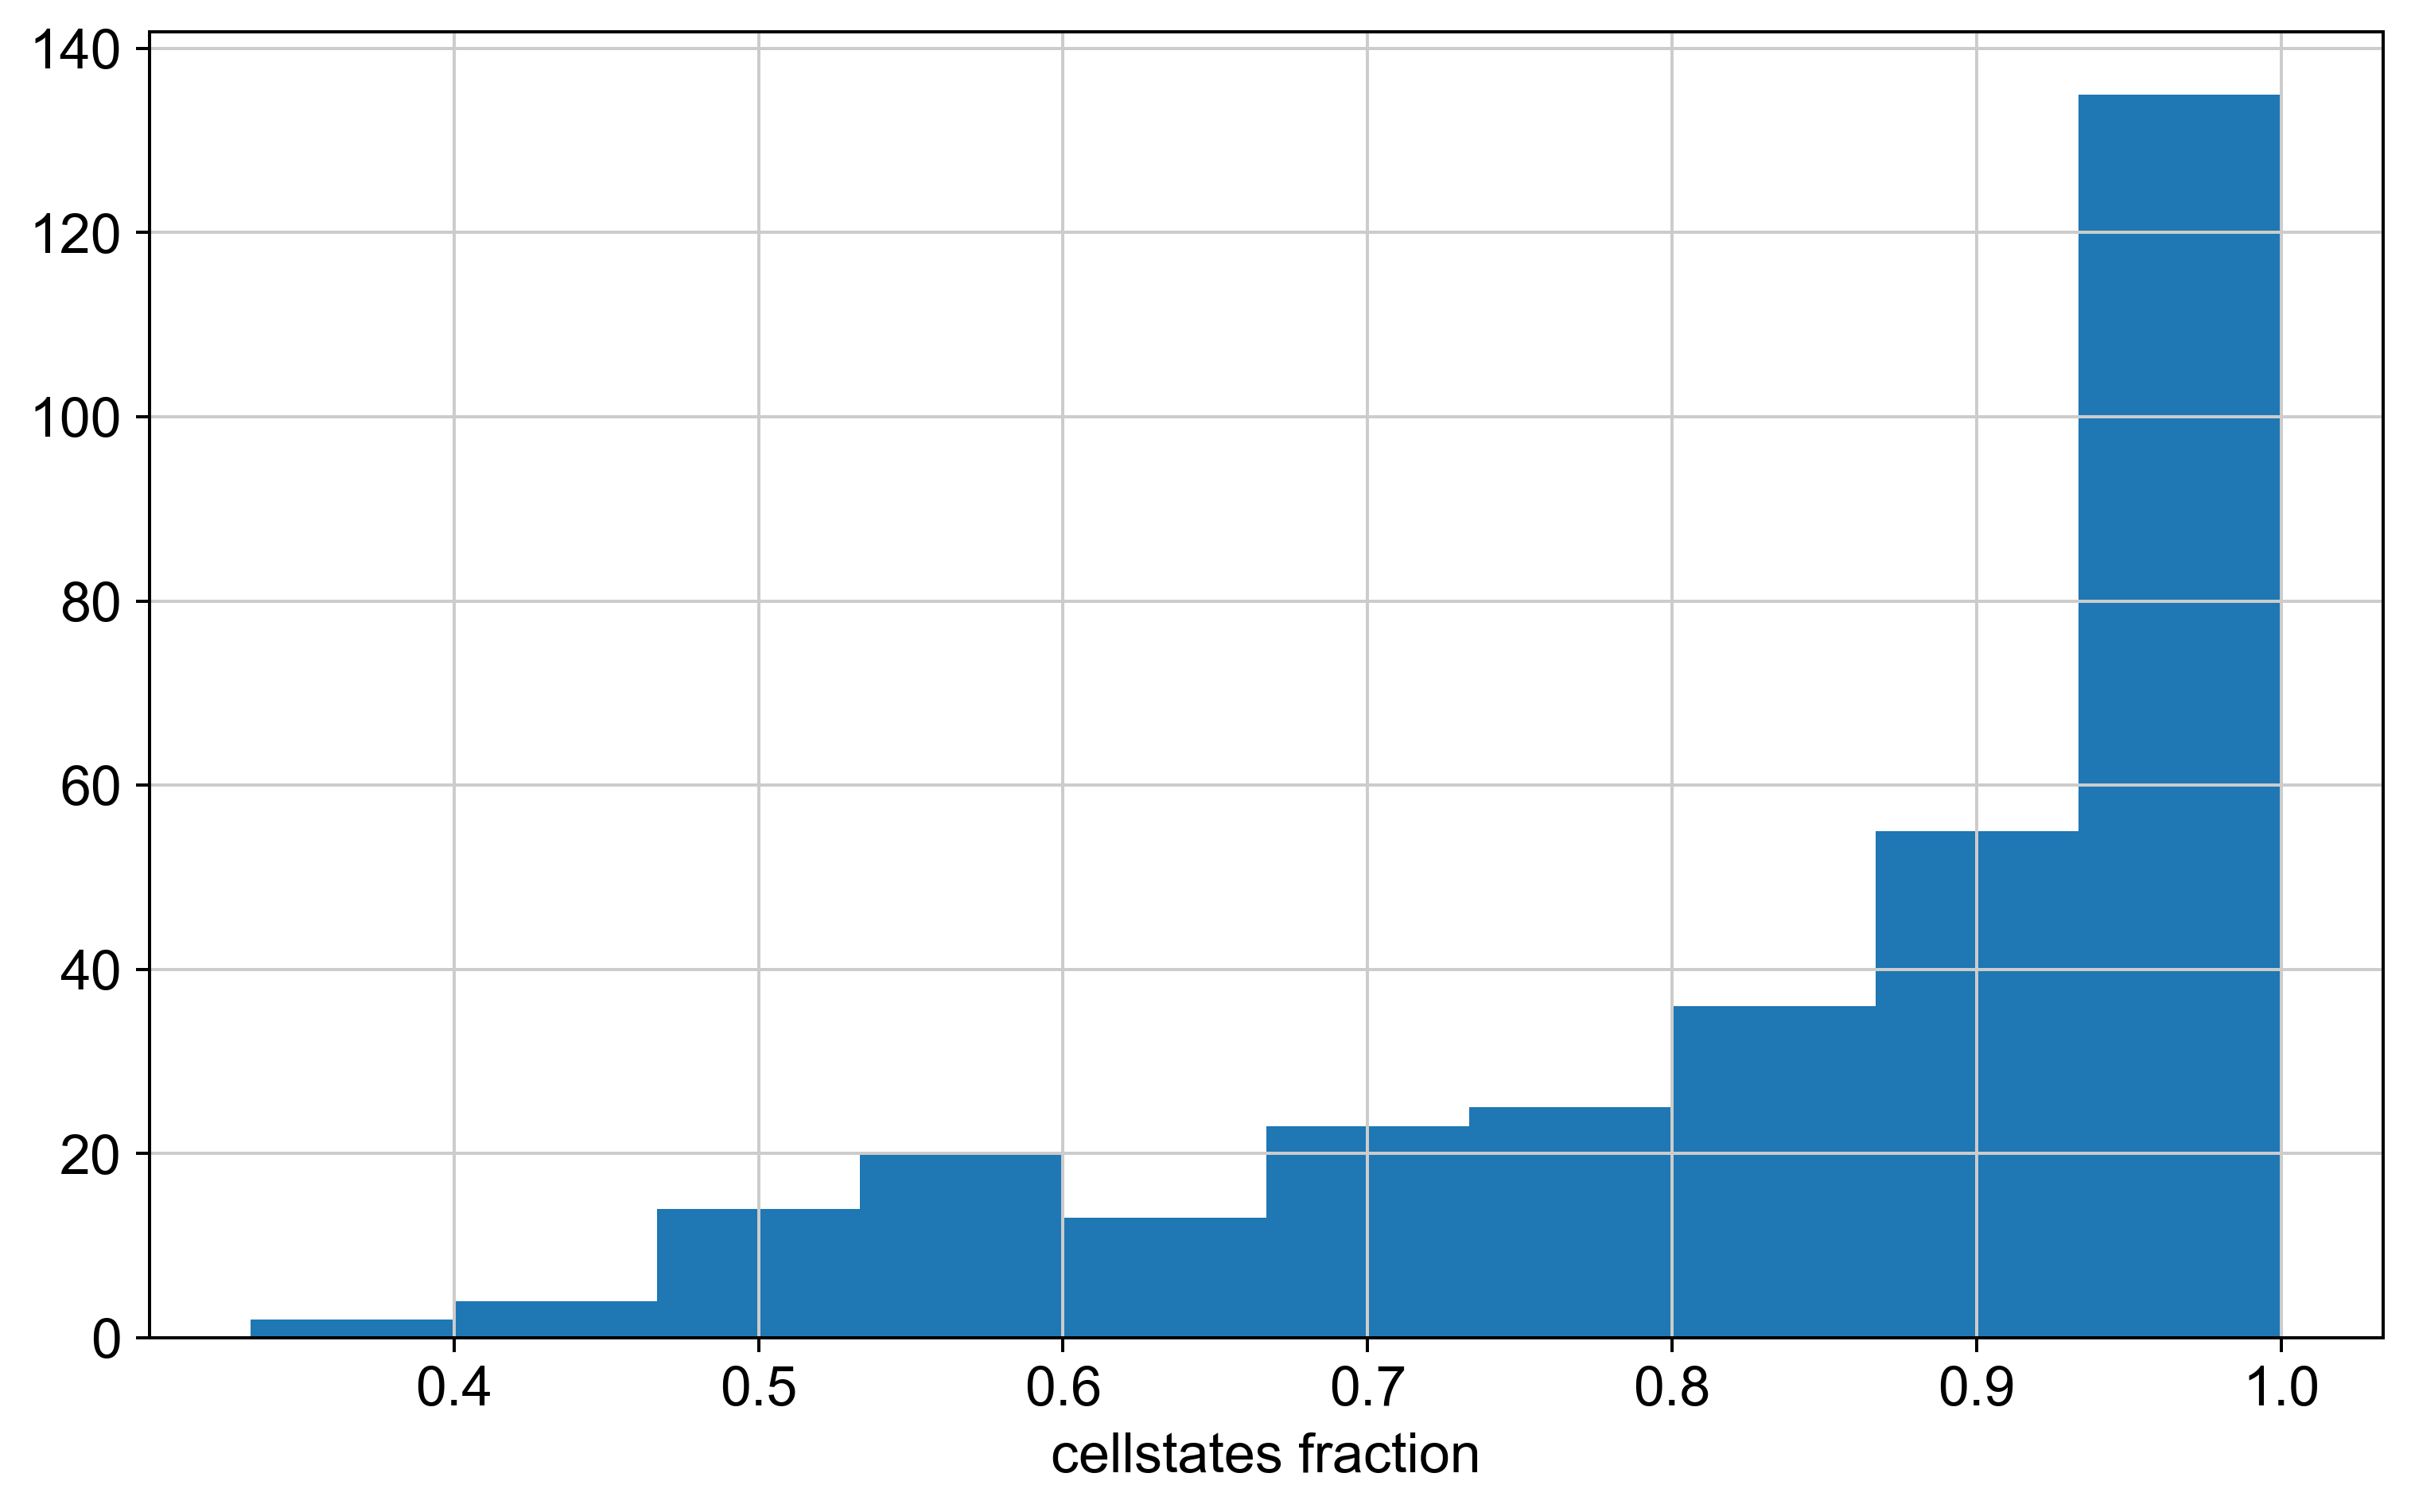

In [17]:
plt.hist(adata.uns['nhood_adata'].obs["nhood_annotation_frac"])
plt.xlabel("cellstates fraction")

In [18]:
nhood_annotation = adata.uns['nhood_adata'].obs['nhood_annotation']
nhood_annotation = nhood_annotation.cat.add_categories(['Ambiguous'])
adata.uns['nhood_adata'].obs['nhood_annotation'] = nhood_annotation

adata.uns['nhood_adata'].obs.loc[adata.uns['nhood_adata'].obs["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Ambiguous"


/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/sea

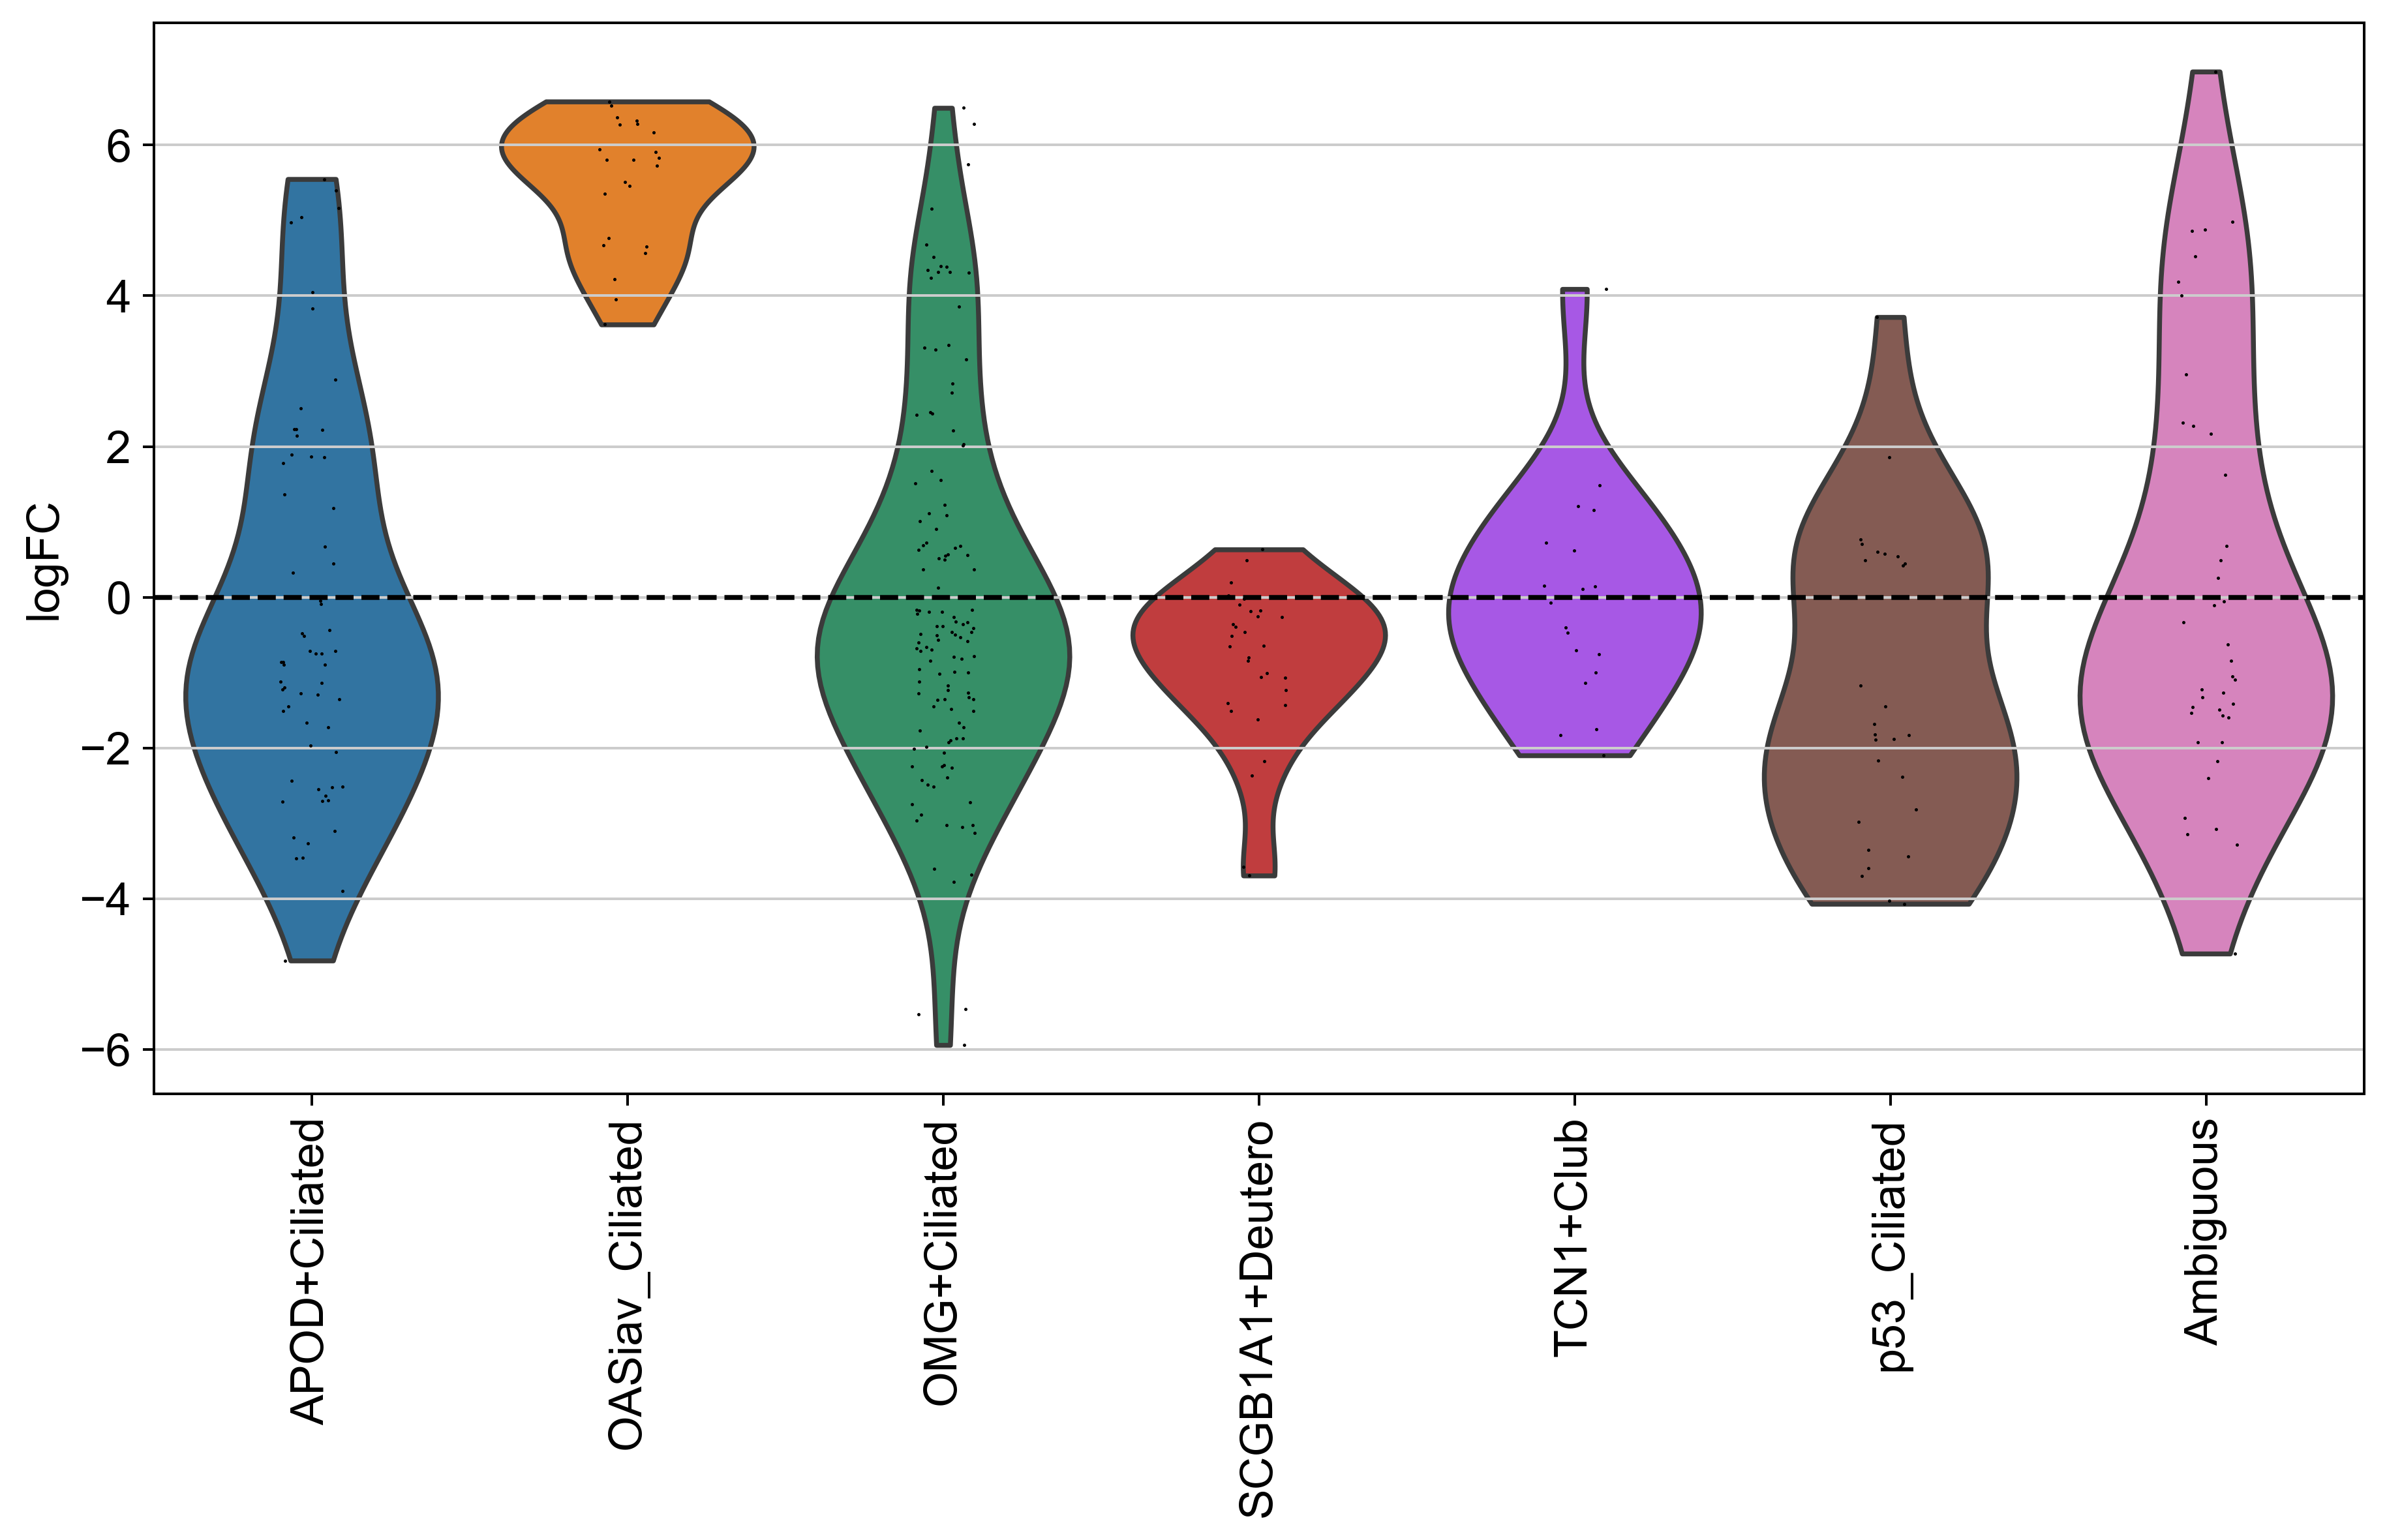

In [19]:
sc.pl.violin(adata.uns['nhood_adata'], "logFC", groupby = "nhood_annotation", rotation = 90, show = False);
plt.axhline(y = 0, color = 'black', linestyle = '--');
plt.show()